# **Title of the project:**
###Movie Recommendations

#**Team Members:** 
###Pranav Kumar Jain R

#**Problem Statement:** 
###To provide movie recommendations to users.

#**Data Description:** 
### Movielens dataset contains movies.csv and ratings.csv. movies.csv has columns movieId, title, genres and ratings.csv has columns userId, movieId, ratings, timestamp.

#**Software Requirements and Platforms used:** 
### Jupyter Notebook, R, Excel

# CO1 : Know your Data 

In [30]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [31]:
%%R
movies=read.csv("movies.csv")
ratings=read.csv("ratings.csv")

In [32]:
%%R
head(movies)

  movieId                              title
1       1                   Toy Story (1995)
2       2                     Jumanji (1995)
3       3            Grumpier Old Men (1995)
4       4           Waiting to Exhale (1995)
5       5 Father of the Bride Part II (1995)
6       6                        Heat (1995)
                                       genres
1 Adventure|Animation|Children|Comedy|Fantasy
2                  Adventure|Children|Fantasy
3                              Comedy|Romance
4                        Comedy|Drama|Romance
5                                      Comedy
6                       Action|Crime|Thriller


In [33]:
%%R
head(ratings)

  userId movieId rating timestamp
1      1       1      4 964982703
2      1       3      4 964981247
3      1       6      4 964982224
4      1      47      5 964983815
5      1      50      5 964982931
6      1      70      3 964982400


In [34]:
%%R
dim(movies)

[1] 9742    3


In [35]:
%%R
dim(ratings)

[1] 100836      4


In [36]:
%%R
str(movies)

'data.frame':	9742 obs. of  3 variables:
 $ movieId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ title  : chr  "Toy Story (1995)" "Jumanji (1995)" "Grumpier Old Men (1995)" "Waiting to Exhale (1995)" ...
 $ genres : chr  "Adventure|Animation|Children|Comedy|Fantasy" "Adventure|Children|Fantasy" "Comedy|Romance" "Comedy|Drama|Romance" ...


In [37]:
%%R
str(ratings)

'data.frame':	100836 obs. of  4 variables:
 $ userId   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ movieId  : int  1 3 6 47 50 70 101 110 151 157 ...
 $ rating   : num  4 4 4 5 5 3 5 4 5 5 ...
 $ timestamp: int  964982703 964981247 964982224 964983815 964982931 964982400 964980868 964982176 964984041 964984100 ...


In [38]:
%%R
summary(ratings$rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.500   3.000   3.500   3.502   4.000   5.000 


# CO2: Data Wrangling

In [39]:
%%R
library(ggplot2)
library(tidyr)
library(dplyr)
library(stringi)
library(reshape2)
library(recommenderlab)

In [40]:
%%R
#Create ratings matrix with rows as users and columns as movies
#userId values will be in rows and movieId values will become column names
ratingmat = dcast(ratings, userId~movieId, value.var = "rating", na.rm=FALSE)
#We can now remove user ids
ratingmat = as.matrix(ratingmat[,-1])

In [41]:
%%R
#Convert ratings matrix to real rating matrix which makes it dense
#an object class created within `recommenderlab` for efficient storage of user-item ratings matrices
#It's been optimized for storing sparse matrices
ratingmat = as(ratingmat, "realRatingMatrix")
ratingmat

610 x 9724 rating matrix of class ‘realRatingMatrix’ with 100836 ratings.


# CO3: Data Modeling and Analysis

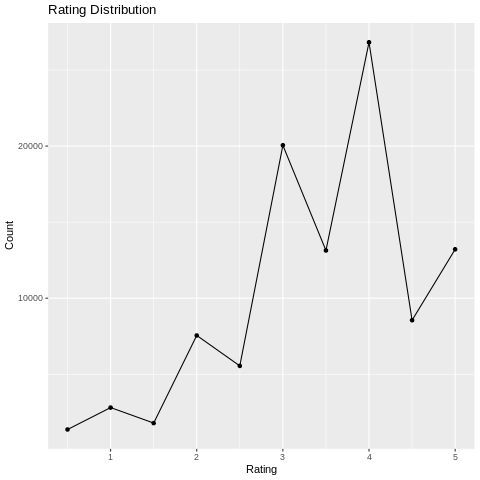

In [42]:
%%R
ratings %>% group_by(rating) %>% summarize(count=n()) %>% 
    ggplot(aes(x=rating, y=count)) + 
    geom_line() +
    geom_point() +
    ggtitle("Rating Distribution") + 
    xlab("Rating") +
    ylab("Count")

In [43]:
%%R
genres_df <- movies %>%
  separate_rows(genres, sep = "\\|") %>%
  group_by(genres) %>%
  summarise(number = n()) %>%
  arrange(desc(number))

print(genres_df)

# A tibble: 20 × 2
   genres             number
   <chr>               <int>
 1 Drama                4361
 2 Comedy               3756
 3 Thriller             1894
 4 Action               1828
 5 Romance              1596
 6 Adventure            1263
 7 Crime                1199
 8 Sci-Fi                980
 9 Horror                978
10 Fantasy               779
11 Children              664
12 Animation             611
13 Mystery               573
14 Documentary           440
15 War                   382
16 Musical               334
17 Western               167
18 IMAX                  158
19 Film-Noir              87
20 (no genres listed)     34


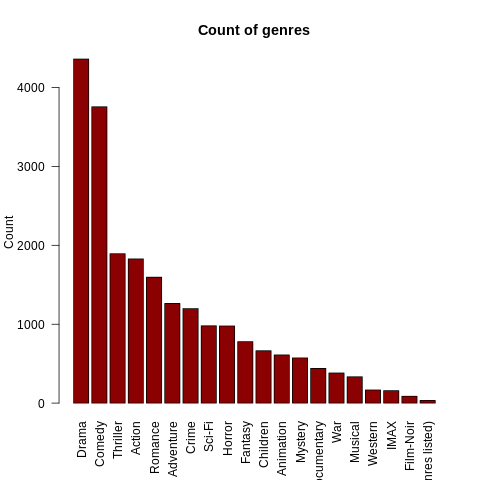

In [44]:
%%R
barplot(genres_df$number,
main = "Count of genres",
ylab = "Count",
names.arg = genres_df$genres,
las=2,
col = "darkred")

# CO4: Mining Techniques in R

In [59]:
%%R
eval_sets <- evaluationScheme(data = ratingmat, method = "split", train = 0.8, given = 19, goodRating = 3)

In [46]:
%%R
# Item based collaborative filtering finds similarity patterns between items and recommends them to users
# User based collaborative filtering finds similar users and gives them recommendations based on what other people with similar consumption patterns prefer

# pearson correlation coefficient defined as the covariance between two vectors divided by their standard deviations. 
# cosine similarity defined as the angular similarity between two vectors.

models <- list(
IBCF_cos = list(name = "IBCF", param = list(method = "cosine")),
IBCF_cor = list(name = "IBCF", param = list(method = "pearson")),
UBCF_cos = list(name = "UBCF", param = list(method = "cosine")),
UBCF_cor = list(name = "UBCF", param = list(method = "pearson"))
)

In [60]:
%%R
eval_results <- evaluate(x = eval_sets, method = models, n = 1:19)

IBCF run fold/sample [model time/prediction time]
	 1  [92.828sec/0.174sec] 
IBCF run fold/sample [model time/prediction time]
	 1  [80.725sec/0.186sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.012sec/4.205sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.009sec/2.115sec] 


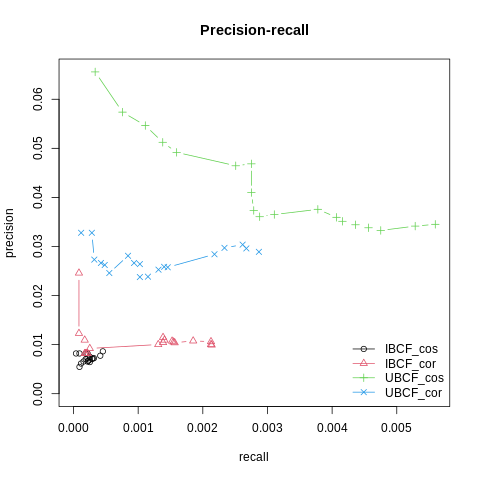

In [61]:
%%R
plot(eval_results, "prec/rec", legend = "bottomright") 
title("Precision-recall")

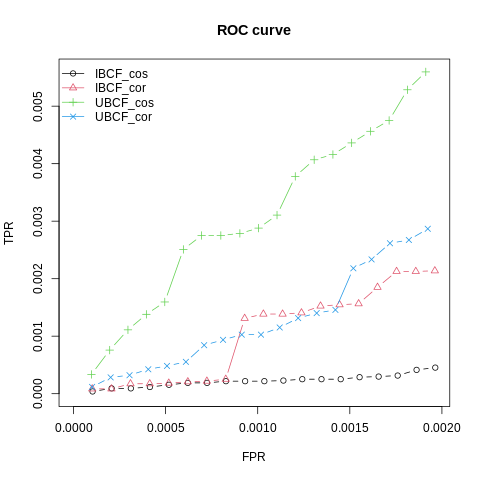

In [62]:
%%R
plot(eval_results, legend = "topleft") 
title("ROC curve")

# CO5: Implementing case study in R : Describe the scenario taken for analysis 

In [63]:
%%R
#Create Recommender. The parameters are UBCF and Cosine similarity
rec_mod = Recommender(ratingmat, method = "UBCF", param=list(method="cosine",nn=10)) 

In [64]:
%%R
#Obtain top 5 recommendations for 1st user entry in dataset
Top_5_pred = predict(rec_mod, ratingmat[1], n=5)

In [65]:
%%R
#Convert the recommendations to a list
Top_5_List = as(Top_5_pred, "list")
Top_5_List

[[1]]
[1] "32"    "30803" "5066"  "42728" "55052"



In [66]:
%%R
#We convert the list to a dataframe and change the column name to movieId
Top_5_df=data.frame(Top_5_List)
colnames(Top_5_df)="movieId"

#Since movieId is of type integer in Movies data, we typecast id in our recommendations as well
Top_5_df$movieId=as.numeric(Top_5_df$movieId)

#Merge the movie ids with names to get titles and genres
names=left_join(Top_5_df, movies, by="movieId")

#Print the titles and genres
names

  movieId                                     title                  genres
1      32 Twelve Monkeys (a.k.a. 12 Monkeys) (1995) Mystery|Sci-Fi|Thriller
2   30803                   3-Iron (Bin-jip) (2004)           Drama|Romance
3    5066                Walk to Remember, A (2002)           Drama|Romance
4   42728                   Tristan & Isolde (2006)           Drama|Romance
5   55052                          Atonement (2007)       Drama|Romance|War
